In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Number of vectors and their length
num_vectors = 1000
vector_length = 100

In [9]:
# Creating 1000 vectors
vectors = []
alpha_beta_pairs = []

for _ in range(num_vectors):
    # Randomly select alpha and beta such that beta >= alpha
    alpha = np.random.uniform(0.5, 2)
    beta = np.random.uniform(alpha, 10)
    alpha_beta_pairs.append((alpha, beta))
    
    # Generate a vector from the beta distribution
    vector = np.random.beta(alpha, beta, vector_length)
    # Order the vector from greatest to least
    vector_sorted = -np.sort(-vector)
    vectors.append(vector_sorted)

In [10]:
# Randomly scaling each vector by a number between 0 and 1
scaled_vectors = [vector * np.random.uniform(0, 1) for vector in vectors]

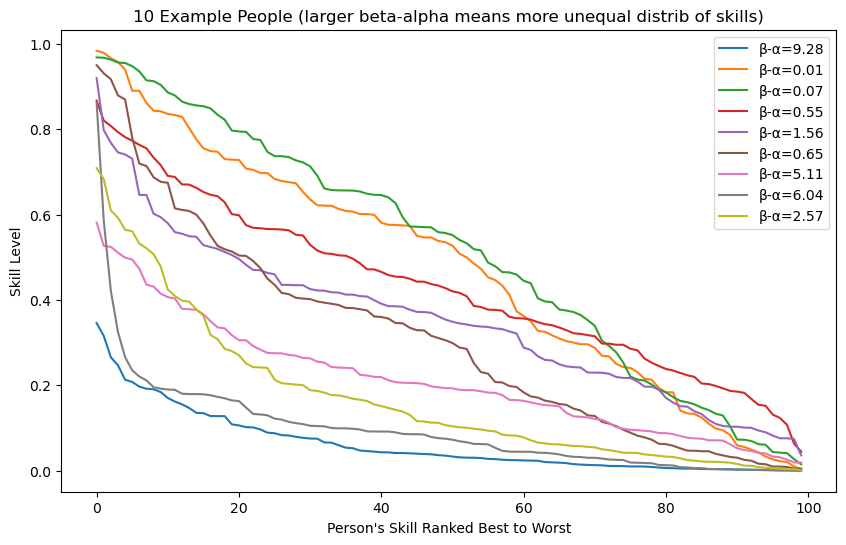

In [29]:
# Identifying the vectors with the largest and smallest difference between alpha and beta
differences = [beta - alpha for alpha, beta in alpha_beta_pairs]
max_diff_index = np.argmax(differences)
min_diff_index = np.argmin(differences)

# Choosing three random vectors
random_indices = np.random.choice(range(num_vectors), 7, replace=False)

# Indices of vectors to plot
indices_to_plot = [max_diff_index, min_diff_index] + random_indices.tolist()

# Creating the plot
plt.figure(figsize=(10, 6))
for index in indices_to_plot:
    alpha, beta = alpha_beta_pairs[index]
    plt.plot(vectors[index], label=f'β-α={(beta-alpha):.2f}')

plt.xlabel("Person's Skill Ranked Best to Worst")
plt.ylabel('Skill Level')
plt.title('10 Example People (larger beta-alpha means more unequal distrib of skills)')
plt.legend()
plt.savefig("example_people.png", bbox_inches='tight')
plt.show()

/Users/tunadorable/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tunadorable/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tunadorable/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tunadorable/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

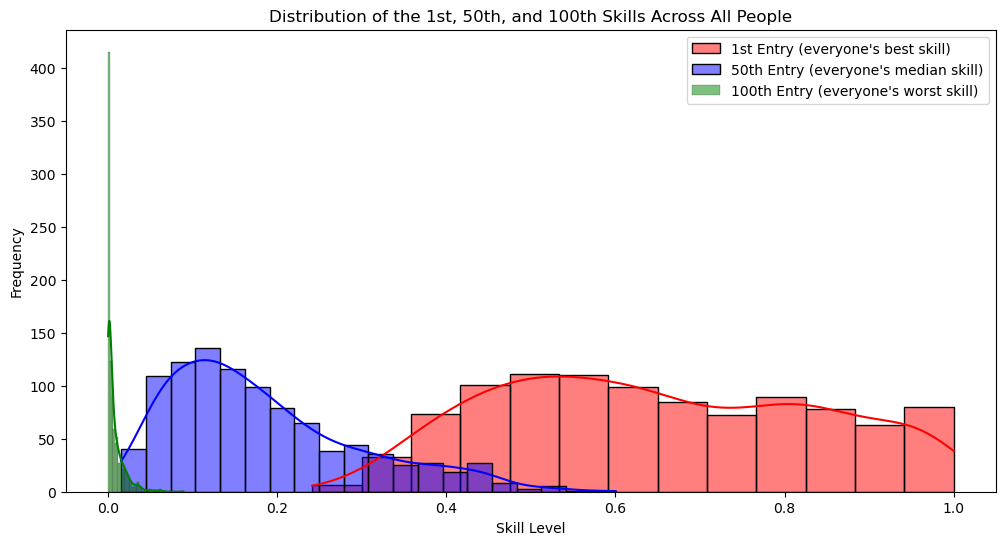

In [30]:
import seaborn as sns

# Extracting the first, 50th, and 100th entry from each vector
first_entries = [vector[0] for vector in vectors]
fiftieth_entries = [vector[49] for vector in vectors]
hundredth_entries = [vector[99] for vector in vectors]

# Creating the distribution plot
plt.figure(figsize=(12, 6))

sns.histplot(first_entries, color="red", kde=True, label="1st Entry (everyone's best skill)")
sns.histplot(fiftieth_entries, color="blue", kde=True, label="50th Entry (everyone's median skill)")
sns.histplot(hundredth_entries, color="green", kde=True, label="100th Entry (everyone's worst skill)")

plt.xlabel('Skill Level')
plt.ylabel('Frequency')
plt.title('Distribution of the 1st, 50th, and 100th Skills Across All People')
plt.legend()
plt.savefig("population_distrib.png", bbox_inches='tight')
plt.show()

In [25]:
# Define the function to compute y_i,j from x_i,j and the difference beta - alpha
def compute_y(x_ij, beta_minus_alpha):
    # beta_minus_alpha going unused for now
    return (1 - x_ij) * (np.sin(2 * np.pi * x_ij / 2))

# Creating 1000 y vectors corresponding to the 1000 x vectors
y_vectors = []
for i, x_vector in enumerate(vectors):
    beta_minus_alpha = differences[i]
    y_vector = [compute_y(x_ij, beta_minus_alpha) for x_ij in x_vector]
    y_vectors.append(y_vector)

# Creating 1000 more vectors by adding x's and y's
sum_vectors = [np.array(x) + np.array(y) for x, y in zip(vectors, y_vectors)]

# Converting sum_vectors to numpy array for easy access in future operations
sum_vectors = np.array(sum_vectors)

# Displaying the shape of sum_vectors to confirm successful creation
sum_vectors.shape


(1000, 100)

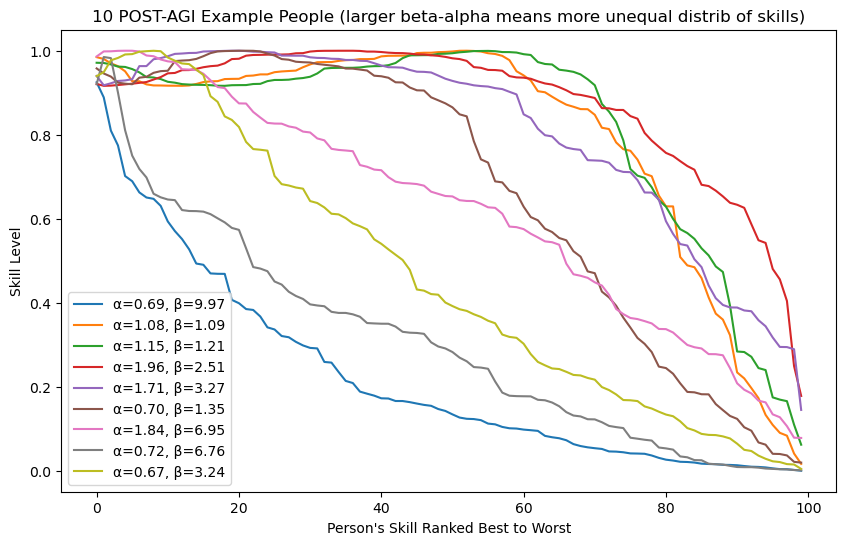

In [31]:
# Creating the plot
plt.figure(figsize=(10, 6))
for index in indices_to_plot:
    alpha, beta = alpha_beta_pairs[index]
    plt.plot(sum_vectors[index], label=f'α={alpha:.2f}, β={beta:.2f}')

plt.xlabel("Person's Skill Ranked Best to Worst")
plt.ylabel('Skill Level')
plt.title('10 POST-AGI Example People (larger beta-alpha means more unequal distrib of skills)')
plt.legend()
plt.savefig("example_people_post_agi.png", bbox_inches='tight')
plt.show()

/Users/tunadorable/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tunadorable/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tunadorable/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tunadorable/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

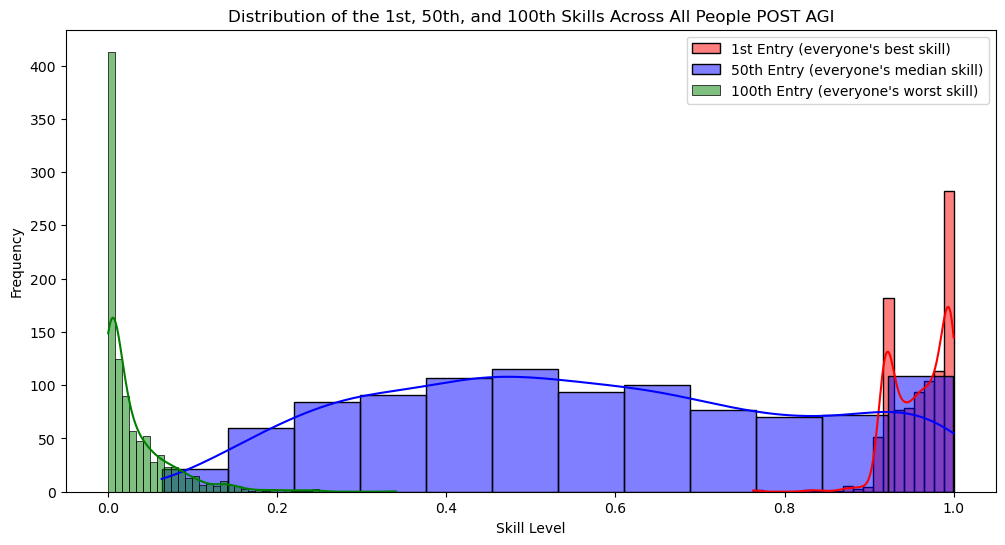

In [33]:
# Extracting the first, 50th, and 100th entry from each sum vector
sum_first_entries = sum_vectors[:, 0]
sum_fiftieth_entries = sum_vectors[:, 49]
sum_hundredth_entries = sum_vectors[:, 99]

# Creating the distribution plot for sum vectors
plt.figure(figsize=(12, 6))

sns.histplot(sum_first_entries, color="red", kde=True, label="1st Entry (everyone's best skill)")
sns.histplot(sum_fiftieth_entries, color="blue", kde=True, label="50th Entry (everyone's median skill)")
sns.histplot(sum_hundredth_entries, color="green", kde=True, label="100th Entry (everyone's worst skill)")

plt.xlabel('Skill Level')
plt.ylabel('Frequency')
plt.title('Distribution of the 1st, 50th, and 100th Skills Across All People POST AGI')
plt.legend()
plt.savefig("population_distrib_post_agi.png", bbox_inches='tight')
plt.show()
